In [2]:
import sys
sys.path.append('C:/Program Files/Stata17/utilities')
from pystata import config
# Try a different edition if you're not sure which one you have
config.init('se')  # Try Stata/SE instead of MP
# Or
config.init('be')  # Try Stata/BE

In [3]:
import tempfile
import os
import pandas as pd
from pystata import stata

# Step 1: Load the Stata dataset via pystata
stata.run('use "Nankana2.dta", clear') 



# Optionally, run any preprocessing commands in Stata here:
# stata.run('drop if missing(some_variable)')
# stata.run('keep if condition')

# Step 2: Create a temporary CSV file for exporting data
temp_csv = tempfile.NamedTemporaryFile(delete=False, suffix=".csv")
temp_csv.close()  # Close the file so that Stata can write to it

# Export the dataset to the temporary CSV file using Stata's export command
stata.run(f'export delimited using "{temp_csv.name}", replace')

# Step 3: Read the exported CSV into a Pandas DataFrame
df = pd.read_csv(temp_csv.name,low_memory=False)

# (Optional) Remove the temporary file now that the data is loaded
os.unlink(temp_csv.name)

# Verify the data loaded correctly
print(df.head())

file C:\Users\PMLS\AppData\Local\Temp\tmpsw9q0pmw.csv saved
      hhcode      psu province region       district  idc  \
0  225100103  2251001   punjab  rural  nankana sahib    3   
1  225100106  2251001   punjab  rural  nankana sahib    3   
2  225100109  2251001   punjab  rural  nankana sahib    5   
3  225100109  2251001   punjab  rural  nankana sahib    3   
4  225100109  2251001   punjab  rural  nankana sahib    4   

  relationship_to_head     reason_for_headship  gender residence_status  ...  \
0         son/daughter  main economic provider  female          present  ...   
1         son/daughter  main economic provider  female          present  ...   
2         son/daughter  main economic provider    male          present  ...   
3         son/daughter  main economic provider    male          present  ...   
4         son/daughter  main economic provider  female          present  ...   

   edu_level  edu_level_num  head_gender  employment_income  \
0        NaN            NaN  

In [4]:
missing_count = df['household_ran_out_of_food'].isna().sum()

In [5]:
print(missing_count)

81


In [6]:
missing_percentage = (81 / len(df)) * 100
print(f"Don't know responses: {missing_percentage:.2f}%")

Don't know responses: 4.99%


In [7]:
features = [
    'age', 'born_district_type', 'born_in_district', 'can_do_math', 
    'can_report_income', 'can_write', 'computer_location', 'connected_to_sewerage', 
    'cooking_water_source', 'disability', 'dwelling_type', 'employment_status', 
    'first_prenatal_visit_month', 'gender', 'handwashing_water_source', 'has_computer', 
    'has_handwashing_place', 'has_internet', 'has_job', 'has_mobile', 'has_mobile_phone', 
    'has_property','total_household_income', 
    'house_owner_gender','household_ran_out_of_food', 
    'hungry_but_did_not_eat', 'income_used_for_hh','marital_status', 
    'migration_reason', 'monthly_income', 'no_computer_reason', 'no_mobile_reason', 
    'num_prenatal_visits', 'num_rooms', 'pay_for_water', 'prenatal_consultation_source', 
     'property_owner_gender', 'reason_for_headship', 'region', 
    'relationship_to_head', 'residence_status', 'sick_last_2wks', 'shared_toilet', 
    'sufficient_drinking_water', 'toilet_type', 'used_computer', 'used_mobile', 
    'work_days_last_month', 'worked_last_month', 'worried_about_food', 'disability', 'has_mobile_phone',
    'house_owner_gender','years_to_complete_primary',
    'has_laptop','toilet_type','heating_fuel','head_gender','head_age','head_edu_level_num','occupancy_status','received_in_kind_income',
]

    


In [42]:
df['household_ran_out_of_food'] = df['household_ran_out_of_food'].fillna(2)  # 2 represents "don't know"
# Fill missing values with the mean of the column
df['head_edu_level_num'].fillna(df['head_edu_level_num'].mean(), inplace=True)



C:\Users\PMLS\AppData\Local\Temp\ipykernel_49504\3298574877.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['head_edu_level_num'].fillna(df['head_edu_level_num'].mean(), inplace=True)


In [43]:
feature_names = df.columns.tolist()
print(feature_names )

['hhcode', 'psu', 'province', 'region', 'district', 'idc', 'relationship_to_head', 'reason_for_headship', 'gender', 'residence_status', 'age', 'age_days', 'age_month', 'birth_year', 'marital_status', 'spouse_id', 'father_id', 'mother_id', 'household_member', 'born_in_district', 'born_district_type', 'born_district_code', 'migration_year', 'prev_district_type', 'prev_district_code', 'migration_reason', 'difficulty_seeing', 'difficulty_hearing', 'difficulty_walking', 'memory_problem', 'difficulty_self_care', 'difficulty_speaking', 'can_read', 'can_write', 'can_do_math', 'attended_training', 'education_background', 'no_school_reason', 'last_school_type', 'school_enrollment_reason', 'highest_grade', 'years_to_complete_primary', 'enrolled_last_year', 'last_year_grade', 'completed_last_year_grade', 'left_school_reason', 'current_school_type', 'current_school_reason', 'school_start_age', 'current_grade', 'enrolled_last_year_current', 'last_year_grade_current', 'yrs_to_complete_pri_current', '

In [44]:
# # Assuming df is your DataFrame
# import pandas as pd

# # List of selected features
# features = [
#     'age', 'birth_last_3yrs', 'born_district_type', 'born_in_district', 'can_do_math', 
#     'can_report_income', 'can_write', 'computer_location', 'connected_to_sewerage', 
#     'cooking_water_source', 'disability', 'dwelling_type', 'employment_status', 
#     'first_prenatal_visit_month', 'gender', 'handwashing_water_source', 'has_computer', 
#     'has_handwashing_place', 'has_internet', 'has_job', 'has_mobile', 'has_mobile_phone', 
#     'has_property','total_household_income', 
#     'house_owner_gender','household_ran_out_of_food', 
#     'hungry_but_did_not_eat', 'income_used_for_hh','marital_status', 
#     'migration_reason', 'monthly_income', 'no_computer_reason', 'no_mobile_reason', 
#     'num_prenatal_visits', 'num_rooms', 'pay_for_water', 'prenatal_consultation_source', 
#     'prenatal_consultations', 'property_owner_gender', 'reason_for_headship', 'region', 
#     'relationship_to_head', 'residence_status', 'sick_last_2wks', 'shared_toilet', 
#     'sufficient_drinking_water', 'toilet_type', 'used_computer', 'used_mobile', 
#     'work_days_last_month', 'worked_last_month', 'worried_about_food', 'disability', 
#     'has_mobile_phone','total_assets', 'house_owner_gender','years_to_complete_primary',
#     'has_laptop','toilet_type','heating_fuel','head_gender','head_age','head_edu_level_num','transport_mode',
# ]

# # Get missing value percentage
# missing_percentage = df[features].isnull().mean()

# # Filter out features with more than 50% missing values
# filtered_features = [col for col in features if missing_percentage[col] <= 0.5]

# # Optional: See which ones were removed
# removed_features = [col for col in features if missing_percentage[col] > 0.5]

# print("✅ Features kept (<=50% missing):", len(filtered_features))
# print("❌ Features removed (>50% missing):", removed_features)


In [45]:

df['household_ran_out_of_food'] = df['household_ran_out_of_food'].fillna(2)  # 2 represents "don't know"


In [46]:
# Get the percentage of missing values for selected features
missing_percentage = df[features].isnull().mean()

# Convert to dictionary to avoid Series ambiguity
missing_percentage_dict = missing_percentage.to_dict()

# Filter out features with more than 50% missing values
filtered_features = [col for col in features if missing_percentage_dict.get(col, 0) <= 0.5]

# Optional: See which ones were removed
removed_features = [col for col in features if missing_percentage_dict.get(col, 0) > 0.5]

print("✅ Features kept (<=50% missing):", len(filtered_features))
print("❌ Features removed (>50% missing):", removed_features)


✅ Features kept (<=50% missing): 47
❌ Features removed (>50% missing): ['born_district_type', 'can_report_income', 'can_write', 'computer_location', 'employment_status', 'first_prenatal_visit_month', 'total_household_income', 'migration_reason', 'monthly_income', 'no_mobile_reason', 'num_prenatal_visits', 'prenatal_consultation_source', 'property_owner_gender', 'work_days_last_month', 'years_to_complete_primary']


In [47]:
df[filtered_features].count()

age                          1622
born_in_district             1609
can_do_math                   877
connected_to_sewerage        1622
cooking_water_source         1622
disability                   1622
dwelling_type                1622
gender                       1622
handwashing_water_source     1622
has_computer                 1622
has_handwashing_place        1622
has_internet                 1622
has_job                       849
has_mobile                   1608
has_mobile_phone             1622
has_property                 1622
house_owner_gender           1622
household_ran_out_of_food    1622
hungry_but_did_not_eat       1622
income_used_for_hh            877
marital_status               1622
no_computer_reason           1585
num_rooms                    1622
pay_for_water                1622
reason_for_headship          1622
region                       1622
relationship_to_head         1622
residence_status             1622
sick_last_2wks               1608
shared_toilet 

In [48]:
 # target = 'edu_access'
 # # Separate features and target variable
 # X = df[features]
 # y = df[target]


In [49]:
target = 'education_access'

# Encode target variable
y= df[target].map({'Yes': 1, 'No': 0})
X = df[features]

In [50]:
column_list = X.columns.tolist()
print(column_list)

['age', 'born_district_type', 'born_in_district', 'can_do_math', 'can_report_income', 'can_write', 'computer_location', 'connected_to_sewerage', 'cooking_water_source', 'disability', 'dwelling_type', 'employment_status', 'first_prenatal_visit_month', 'gender', 'handwashing_water_source', 'has_computer', 'has_handwashing_place', 'has_internet', 'has_job', 'has_mobile', 'has_mobile_phone', 'has_property', 'total_household_income', 'house_owner_gender', 'household_ran_out_of_food', 'hungry_but_did_not_eat', 'income_used_for_hh', 'marital_status', 'migration_reason', 'monthly_income', 'no_computer_reason', 'no_mobile_reason', 'num_prenatal_visits', 'num_rooms', 'pay_for_water', 'prenatal_consultation_source', 'property_owner_gender', 'reason_for_headship', 'region', 'relationship_to_head', 'residence_status', 'sick_last_2wks', 'shared_toilet', 'sufficient_drinking_water', 'toilet_type', 'used_computer', 'used_mobile', 'work_days_last_month', 'worked_last_month', 'worried_about_food', 'disa

In [51]:
# Encode categorical variables
X = pd.get_dummies(X)


In [52]:
X = X.loc[:, ~X.columns.duplicated()]


In [53]:
column_list = X.columns.tolist()
print(column_list)

['age', 'first_prenatal_visit_month', 'has_property', 'total_household_income', 'household_ran_out_of_food', 'hungry_but_did_not_eat', 'monthly_income', 'num_prenatal_visits', 'num_rooms', 'prenatal_consultation_source', 'property_owner_gender', 'work_days_last_month', 'worried_about_food', 'years_to_complete_primary', 'head_gender', 'head_age', 'head_edu_level_num', 'born_district_type_rural', 'born_in_district_no', 'born_in_district_yes', 'can_do_math_no', 'can_do_math_yes', 'can_report_income_annually', 'can_report_income_monthly', 'can_write_no', 'can_write_yes', 'computer_location_  home', 'computer_location_education place', 'computer_location_others', 'connected_to_sewerage_no, no system', 'connected_to_sewerage_yes under ground drain', 'connected_to_sewerage_yes, to covered drain', 'connected_to_sewerage_yes, to open drain', 'cooking_water_source_ motor pump / tube well', 'cooking_water_source_bottled water', 'cooking_water_source_closed well', 'cooking_water_source_filtration 

In [54]:
duplicates = X.columns[X.columns.duplicated()]
print(duplicates)


Index([], dtype='object')


In [55]:
X = X[X.columns.drop(list(X.filter(regex='-1')))]

In [56]:
import warnings

# Ignore RuntimeWarnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [57]:
import numpy as np
np.seterr(all="ignore")  # Ignores divide-by-zero and invalid value warnings

from sklearn.preprocessing import MinMaxScaler
 # Assuming X is a pandas DataFrame
scaler = MinMaxScaler()
 # Convert the scaled array back to a DataFrame (optional)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
 # Calculate correlations
correlations = X.corrwith(y)

In [58]:
column_list = X.columns.tolist()

print(column_list)


['age', 'first_prenatal_visit_month', 'has_property', 'total_household_income', 'household_ran_out_of_food', 'hungry_but_did_not_eat', 'monthly_income', 'num_prenatal_visits', 'num_rooms', 'prenatal_consultation_source', 'property_owner_gender', 'work_days_last_month', 'worried_about_food', 'years_to_complete_primary', 'head_gender', 'head_age', 'head_edu_level_num', 'born_district_type_rural', 'born_in_district_no', 'born_in_district_yes', 'can_do_math_no', 'can_do_math_yes', 'can_report_income_annually', 'can_report_income_monthly', 'can_write_no', 'can_write_yes', 'computer_location_  home', 'computer_location_education place', 'computer_location_others', 'connected_to_sewerage_no, no system', 'connected_to_sewerage_yes under ground drain', 'connected_to_sewerage_yes, to covered drain', 'connected_to_sewerage_yes, to open drain', 'cooking_water_source_ motor pump / tube well', 'cooking_water_source_bottled water', 'cooking_water_source_closed well', 'cooking_water_source_filtration 

In [59]:
 # Convert correlations to a DataFrame for better printing
corr_df = pd.DataFrame(correlations.abs().sort_values(ascending=False), columns=['Correlation'])

In [60]:
 # Print all correlations
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
 print(corr_df)


                                                    Correlation
can_do_math_no                                         0.270380
worked_last_month_yes                                  0.227201
income_used_for_hh_yes                                 0.212976
can_report_income_monthly                              0.201696
can_write_yes                                          0.199539
heating_fuel_gas                                       0.173303
employment_status_yes (can't do at all)                0.170463
born_in_district_yes                                   0.163544
household_ran_out_of_food                              0.153669
has_handwashing_place_no                               0.152948
has_handwashing_place_yes                              0.152948
cooking_water_source_ motor pump / tube well           0.151787
handwashing_water_source_ motor pump / tube well       0.151082
handwashing_water_source_hand pump                     0.148829
cooking_water_source_hand pump          

In [61]:
 # Filter for correlations with absolute value greater than 0.01
 selected_features = correlations[abs(correlations) >= 0.018].index
 print(len(X.columns))
 print(len(selected_features))

143
111


In [62]:
 # Filter for correlations with absolute value greater than 0.05
 # Keep only the selected columns in X
 X = X[selected_features]
 print(len(X.columns))

111


In [63]:
# handling the missing values
missing_counts = X.isnull().sum()
thresh = 1500
cols_to_remove = missing_counts[missing_counts > thresh].index.tolist()
print(cols_to_remove)

['total_household_income', 'monthly_income']


In [64]:
X = X.drop(columns=cols_to_remove)

In [65]:
#encoding the catagorical variables
y = pd.get_dummies(y)

In [66]:
from sklearn.model_selection import train_test_split
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Making Random Forest Model

In [67]:
import numpy as np

y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)


In [68]:
# import numpy as np
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# # Initialize the Random Forest Classifier
#     # use all processors

# rf_model = RandomForestClassifier(
#     n_estimators=50,        
#     max_depth=10,            
#     min_samples_split=20,     
#     min_samples_leaf=6,      
#     random_state=42,
#     n_jobs=-1,
#      # Automatically adjusts based on class imbalance
# )

# # Train the model
# rf_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = rf_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Print a detailed classification report
# print(classification_report(y_test, y_pred))

# # Optionally, display the confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", cm)


In [69]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Simplified Random Forest with Overfitting Prevention
rf_model = RandomForestClassifier(
    n_estimators=100,        # Reduced number of trees
    max_depth=30,           # Limit tree depth
    min_samples_split=3,   # Increase minimum samples to split
    min_samples_leaf=5,     # Increase minimum samples in leaf
    random_state=42,
    class_weight='balanced_subsample'
)

# Cross-validation to check model performance
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# Print cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean CV Score: {:.4f} (+/- {:.4f})".format(cv_scores.mean(), cv_scores.std() * 2))

# Fit the model
rf_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = rf_model.predict(X_test)
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

   

Cross-validation scores: [0.83461538 0.85       0.83011583 0.81467181 0.84169884]
Mean CV Score: 0.8342 (+/- 0.0237)

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.63        72
           1       0.89      0.90      0.90       253

    accuracy                           0.84       325
   macro avg       0.76      0.76      0.76       325
weighted avg       0.84      0.84      0.84       325



                                               Feature  Importance
0                                                  age    0.128847
9                                   head_edu_level_num    0.096484
15                                       can_write_yes    0.073601
8                                             head_age    0.066042
11                                      can_do_math_no    0.039386
4                                            num_rooms    0.027453
101                                   heating_fuel_gas    0.025582
2                            household_ran_out_of_food    0.020251
45                                   has_internet_yes     0.020178
46                         has_job_no not seeking work    0.018477
108                         received_in_kind_income_no    0.018245
93                            used_mobile_mobile phone    0.017080
44                                    has_internet_no     0.016998
94                           used_mobile_none of above    0.01

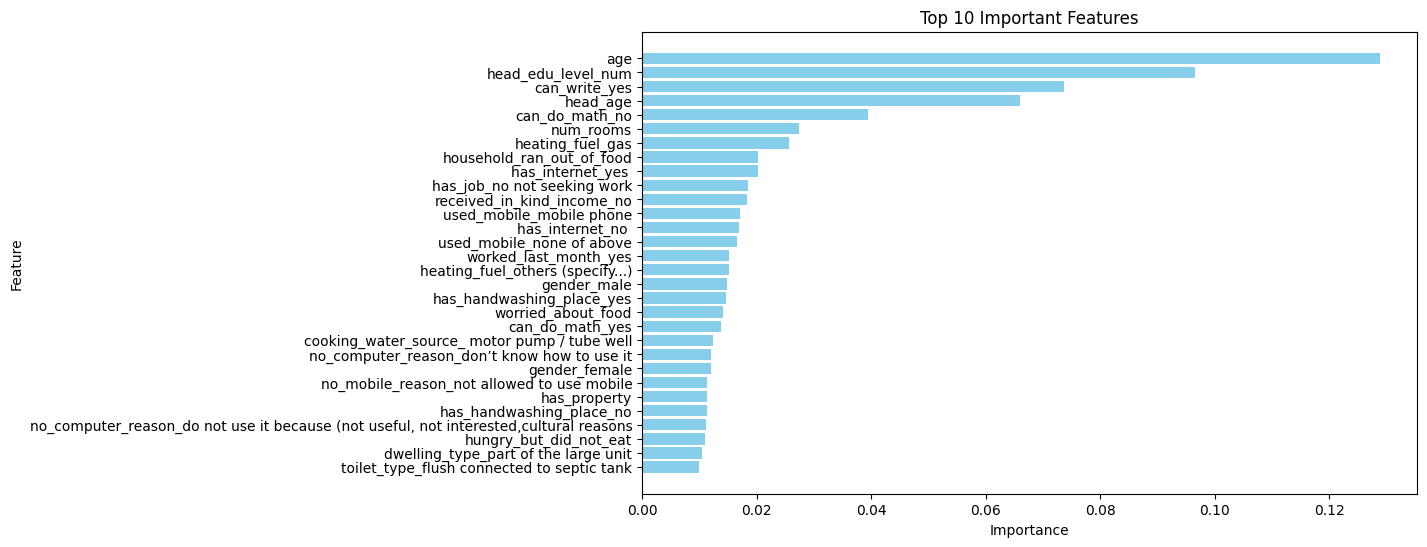

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf_model.feature_importances_

# Convert to DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


# Select top 30 features
top_30_features = feature_importance_df.head(30)

# Display top 30 features
print(top_30_features)

# Display the top features
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:30], feature_importance_df['Importance'][:30], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show top features on top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.show()


In [643]:
df['household_ran_out_of_food'].unique()

array([0., 2., 1.])

# SHAP  Visualizations

In [71]:
import shap

In [39]:
# explainer = shap.Explainer(model, X_train)
# shap_values = explainer.shap_values(X_test)

In [40]:
# test_data = X_test

 97%|=================== | 631/650 [00:27<00:00]       

Full SHAP values shape: (325, 109, 2)
SHAP values for class 1 shape: (325, 109)
Subset SHAP values shape: (300, 109)


C:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


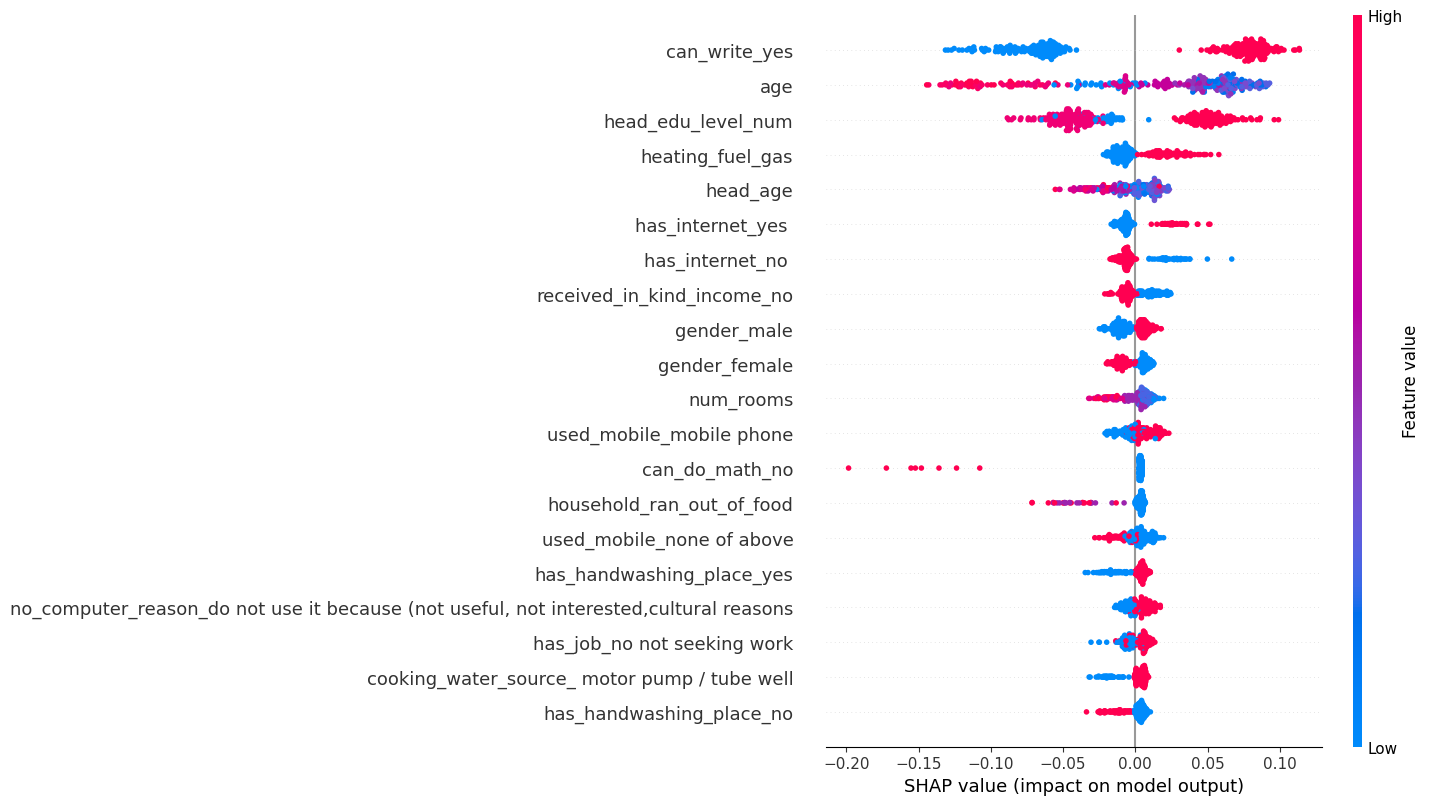

<Figure size 640x480 with 0 Axes>

In [72]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# 1. Create a subset of your test data for visualization
# -------------------------------
# Use the first 300 samples for faster plotting.
X_test_subset = X_test.iloc[:300]

# -------------------------------
# 2. Initialize the Explainer using the universal SHAP Explainer for your Random Forest model
# -------------------------------
explainer = shap.Explainer(rf_model, X_train)

# -------------------------------
# 3. Compute SHAP values on the entire test set, disabling the additivity check.
# -------------------------------
shap_values = explainer(X_test, check_additivity=False)
print("Full SHAP values shape:", shap_values.values.shape)  # Expected: (820, n_features, n_classes)

# -------------------------------
# 4. Extract SHAP values for the positive class (index 1)
# -------------------------------
shap_values_class1 = shap_values.values[:, :, 1]
print("SHAP values for class 1 shape:", shap_values_class1.shape)  # Expected: (820, n_features)

# -------------------------------
# 5. Subset the SHAP values to match the subset of test data
# -------------------------------
shap_values_subset = shap_values_class1[:300, :]
print("Subset SHAP values shape:", shap_values_subset.shape)  # Expected: (300, n_features)

# -------------------------------
# 6. Create the SHAP summary plot for feature importance using the subset
# -------------------------------
plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values_subset,         # SHAP values for the positive class, subset to 300 samples
    X_test_subset,              # Subset of test data for visualization
    feature_names=X_train.columns  # Feature names from your training data
)
plt.tight_layout()
plt.savefig('shap_summary_plot.png', dpi=300)
plt.show()


 99%|===================| 644/650 [00:26<00:00]        

Full SHAP values shape: (325, 109, 2)
SHAP values for class 1 shape: (325, 109)


C:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


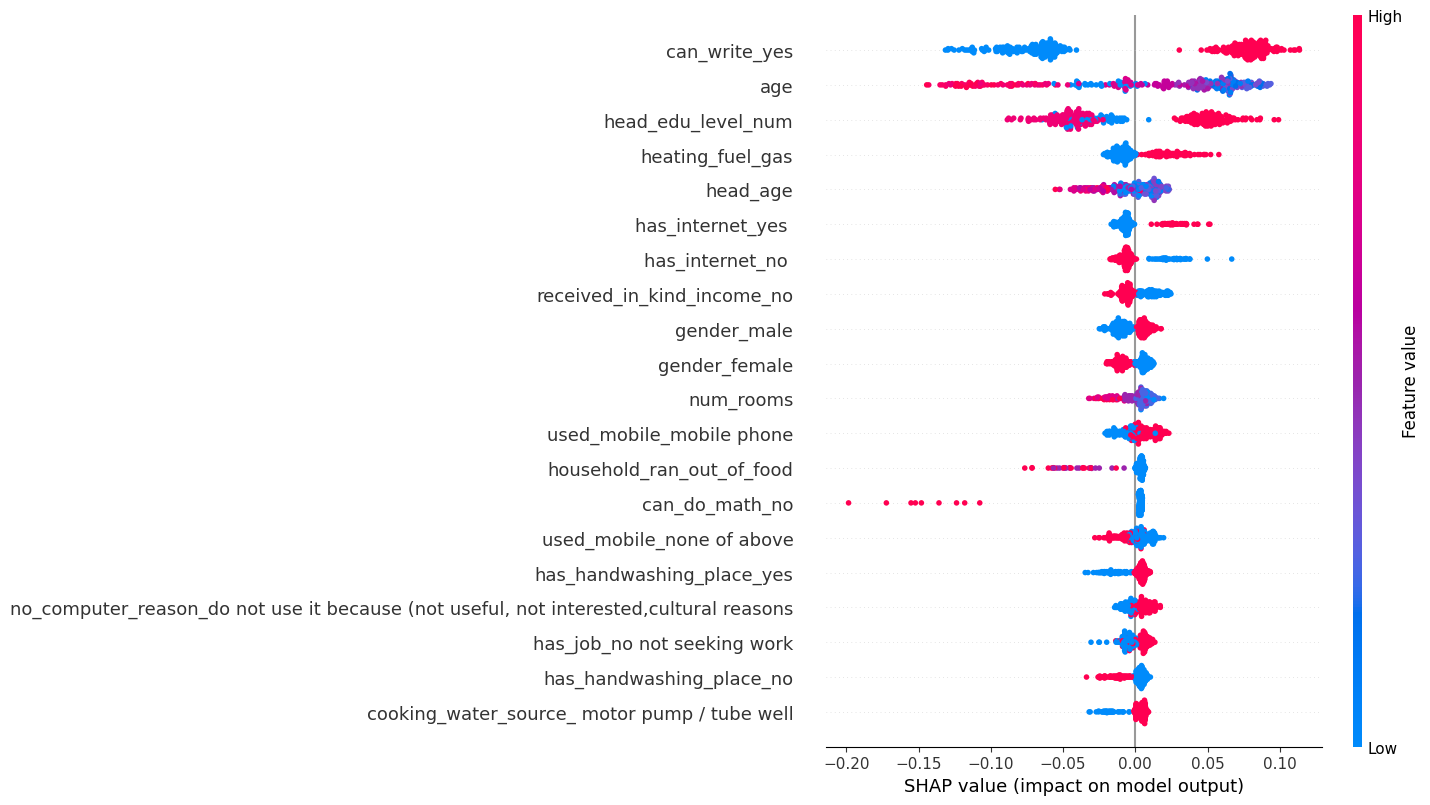

<Figure size 640x480 with 0 Axes>

In [73]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# 1. Use the entire test set for visualization
# -------------------------------
X_test_subset = X_test  # Using the entire test set

# -------------------------------
# 2. Initialize the Explainer for your Random Forest model
# -------------------------------
explainer = shap.Explainer(rf_model, X_train)
  
# -------------------------------
# 3. Compute SHAP values on the entire test set, disabling the additivity check.
# -------------------------------
shap_values = explainer(X_test, check_additivity=False)
print("Full SHAP values shape:", shap_values.values.shape)  
# Expected shape: (n_samples, n_features, n_classes) e.g. (820, 114, 2)

# -------------------------------
# 4. Extract SHAP values for the positive class (index 1)
# -------------------------------
shap_values_class1 = shap_values.values[:, :, 1]
print("SHAP values for class 1 shape:", shap_values_class1.shape)  
# Expected shape: (n_samples, n_features)

# -------------------------------
# 5. Use all SHAP values (matching the entire test set)
# -------------------------------
shap_values_subset = shap_values_class1  # using entire test set

# -------------------------------
# 6. Create the SHAP summary plot for feature importance using the full test set/

# -------------------------------
plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values_subset,         # SHAP values for the positive class for all samples
    X_test_subset,              # The full test set
    feature_names=X_train.columns  # Feature names from your training data
)
plt.tight_layout()
plt.savefig('shap_summary_plot_full.png', dpi=300)
plt.show()


In [74]:
import shap
import matplotlib.pyplot as plt

# Create the SHAP summary plot and save it directly
shap.summary_plot(
    shap_values_subset,        # SHAP values
    X_test_subset,             # Corresponding input data
    feature_names=X_train.columns,  # Feature names
    show=False                 # Prevents it from displaying immediately
)

# Save the current figure in high resolution
plt.savefig('NanKana_summary_plot.png', dpi=600, bbox_inches='tight')  # Increase dpi if needed
plt.close()


C:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


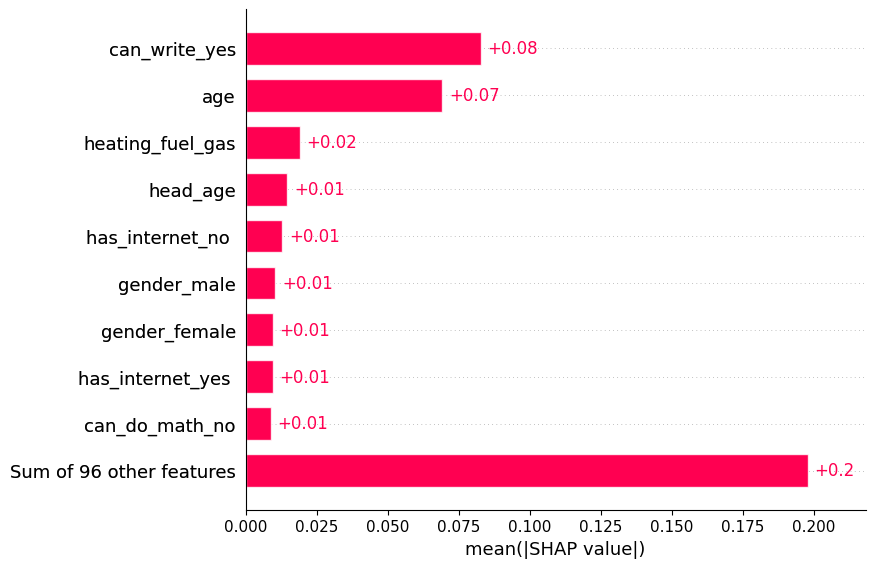

<Figure size 640x480 with 0 Axes>

In [526]:
shap_values_exp = shap.Explanation(
    values=shap_values_subset, 
    base_values=explainer.expected_value[1], 
    data=X_test_subset, 
    feature_names=X_train.columns.to_list()
)

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
shap.plots.bar(shap_values_exp)

plt.savefig('shap_bar_plot.png', dpi=150, bbox_inches='tight')  # Save the plot
plt.show()


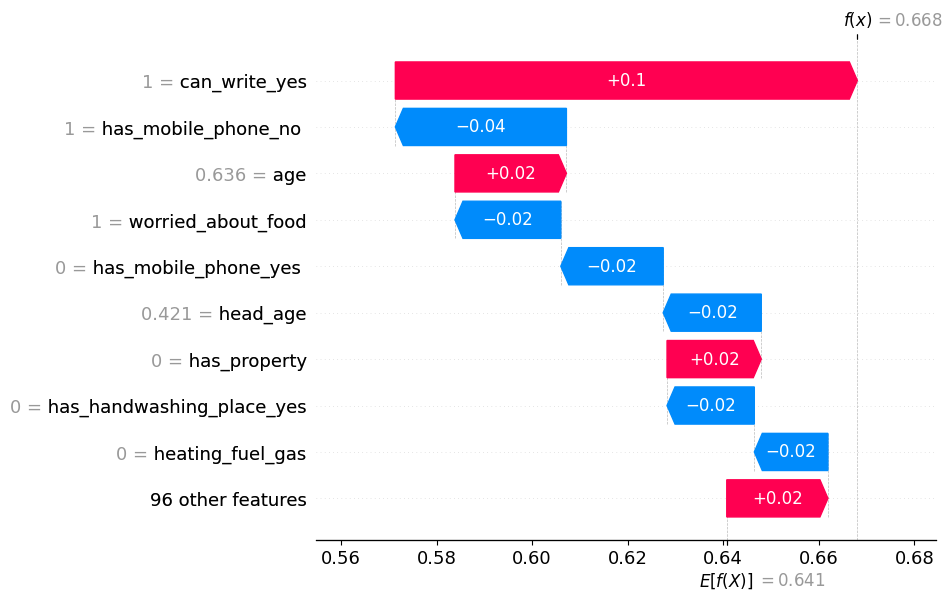

<Figure size 640x480 with 0 Axes>

In [483]:
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_subset[0],  # SHAP values for the first instance
        base_values=explainer.expected_value[1],  # Expected model output for class 1
        data=X_test_subset.iloc[0],  # Feature values for the first instance
        feature_names=X_train.columns.to_list()
    )
)
plt.savefig('shap_waterfall_plot.png', dpi=150)
plt.show()


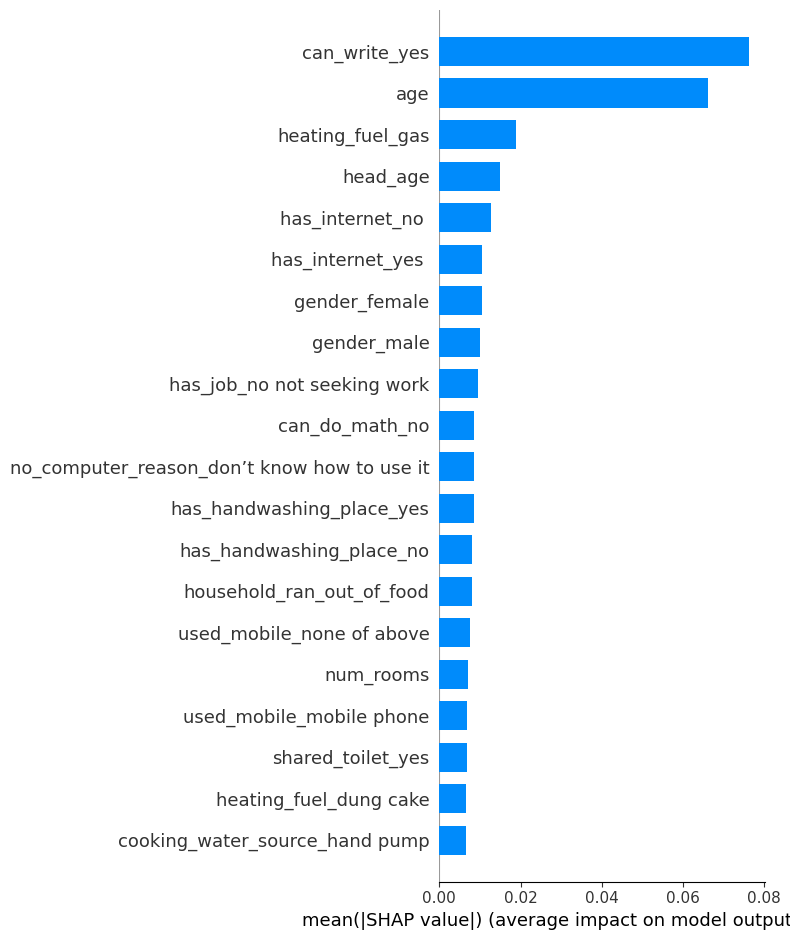

<Figure size 640x480 with 0 Axes>

In [484]:
plt.figure(figsize=(8, 6))
shap.summary_plot(
    shap_values_subset, 
    X_test_subset, 
    feature_names=X_train.columns, 
    plot_type="bar"
)
plt.tight_layout()
plt.savefig('shap_feature_importance_bar.png', dpi=150)
plt.show()


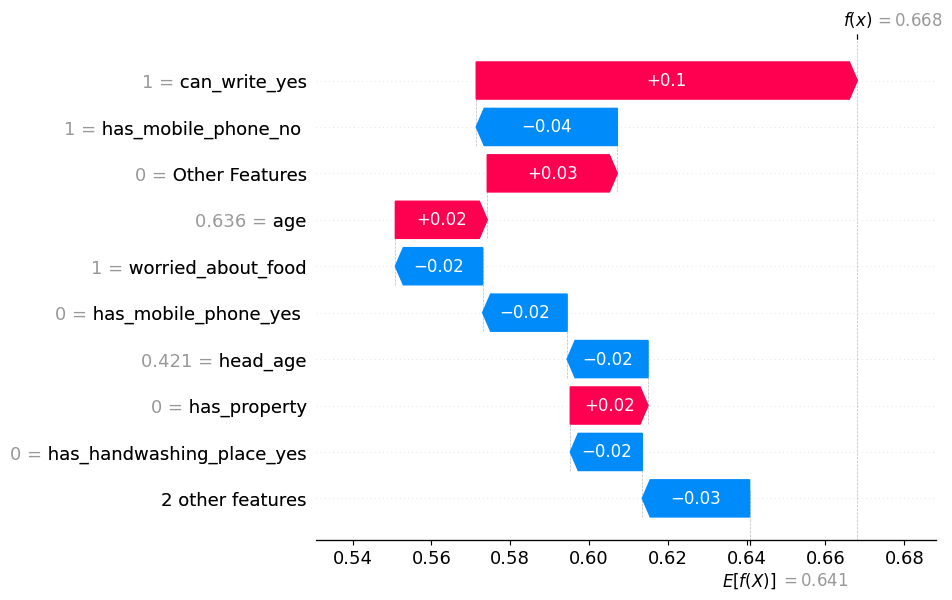

<Figure size 640x480 with 0 Axes>

In [485]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Number of top features to show in the waterfall plot
top_n = 10  

# Extract SHAP values for the first sample
shap_vals = shap_values_subset[0]
feature_names = X_train.columns.to_list()
base_value = explainer.expected_value[1]

# Sort SHAP values by absolute importance
sorted_indices = np.argsort(np.abs(shap_vals))[::-1]  # Descending order
shap_vals_sorted = shap_vals[sorted_indices]
feature_names_sorted = [feature_names[i] for i in sorted_indices]
feature_values_sorted = X_test_subset.iloc[0, sorted_indices]

# Keep only top N features, sum the rest into "Other Features"
if len(shap_vals_sorted) > top_n:
    other_features_sum = np.sum(shap_vals_sorted[top_n:])
    shap_vals_trimmed = np.append(shap_vals_sorted[:top_n], other_features_sum)
    feature_names_trimmed = feature_names_sorted[:top_n] + ["Other Features"]
    feature_values_trimmed = np.append(feature_values_sorted[:top_n], 0)  # No specific value for "Other Features"
else:
    shap_vals_trimmed = shap_vals_sorted
    feature_names_trimmed = feature_names_sorted
    feature_values_trimmed = feature_values_sorted

# Create the SHAP Waterfall Plot
shap.waterfall_plot(
    shap.Explanation(
        values=shap_vals_trimmed,
        base_values=base_value,
        data=feature_values_trimmed,
        feature_names=feature_names_trimmed
    )
)

# Save the figure
plt.savefig('shap_waterfall_plot_modified.png', dpi=150)
plt.show()


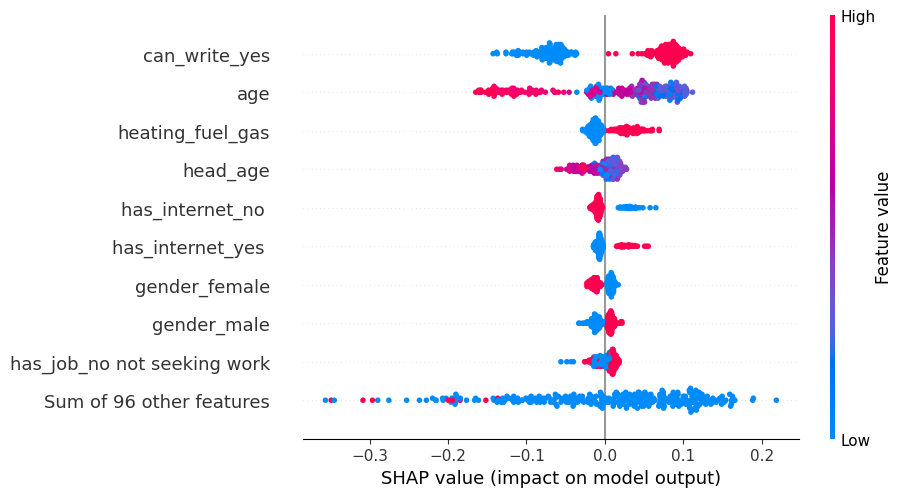

In [486]:
shap.plots.beeswarm(shap_values_exp)

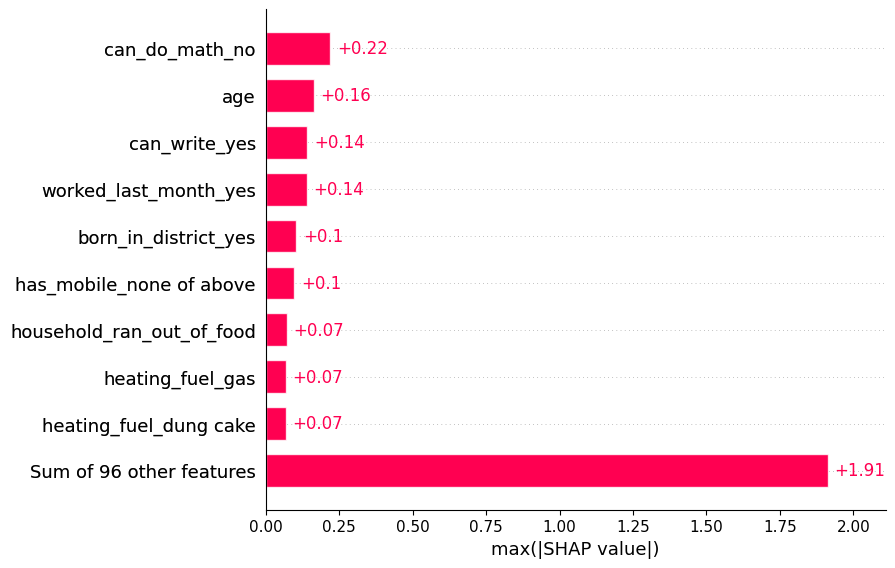

In [488]:
shap.plots.bar(shap_values_exp.abs.max(0))

In [489]:
# Create a DataFrame of SHAP values for class 1
shap_df = pd.DataFrame(shap_values_class1, columns=X_test.columns)

# Compute mean absolute SHAP value for each feature
mean_abs_shap = shap_df.abs().mean().sort_values(ascending=False)

# Get top 30 features
top_30_features = mean_abs_shap.head(30)

# Display the top 30
print("Top 30 Features by SHAP Importance (Mean Absolute Value):")
print(top_30_features)

# Optionally export to CSV
top_30_features.to_csv("top_30_shap_features.csv")


Top 30 Features by SHAP Importance (Mean Absolute Value):
can_write_yes                                                                            0.076416
age                                                                                      0.066118
heating_fuel_gas                                                                         0.018969
head_age                                                                                 0.014995
has_internet_no                                                                          0.012693
has_internet_yes                                                                         0.010602
gender_female                                                                            0.010558
gender_male                                                                              0.009914
has_job_no not seeking work                                                              0.009598
can_do_math_no                                              